# 2.1 need_for_speed

# 1 Overview
1. Python is extremely popular for scientific computing, due to such factors as
   - the **accessible and flexible** nature of the language itself,
   - the huge range of high(**PI: -**)quality scientific **libraries** now available,
   - the fact that the language and libraries are **open(**PI: -**)source**,
   - the popular Ananconda Python distribution, which simplifies installation and management of those libraries, and
   - the recent surge of interest in using Python for machine learning and artificial intelligence.
2. In this lecture(**PI: ,**) we give a short overview of scientific computing in Python, addressing the following questions:
   - what are the relative **strengths and weaknesses** of Python for these tasks?
   - what are the **main elements** of the scientific Python ecosystem?
   - how is the situation **changing** over time?

# 2 Scientific libraries

## 2.1 the role of scientific libraries
1. One obviously reason we use scientific libraries: they implement routines we want to use.
    - e.g. it's almost always better to use an existing routine for root finding than to write a new one from scratch.
    - For standard algorithms, efficiency is maximized if the community can coordinate on a common set of implementations, written by experts and tuned by users to be as fast and robust as possible.
2. Another reason is that pure Python, while flexible and elegent, is not fast.
    - So we need libraries that are designed to accelerate (**PI: the**) execution of Python code.
    - As we will see below, there are now Python libraries that can do this extremely well.
    
## 2.2 python's scientific ecosystem
1. In terms of popularity, the big four in the world of scientific Python libraries:
    - NumPy
    - SciPy
    - Matplotlib
    - Pandas
2. For us, there is another (relatively new) library that will be essential for numerical computing:
    - Numba
3. Over the next few lectures(**PI: ,**) we will see how to use these libraries, but let's quickly review how they fit together:
    - **NumPy** forms the **foundations** by providing a basic array data type (think of vectors and matrices) and functions for acting on these arrays (e.g., matrix multiplication).
    - SciPy builds on NumPy by adding the kinds of **numerical methods that are routinely used in science** (interpolation, optimization, root finding, etc.).
    - Matplotlib is used to **generate figures**, with a focus on plotting data stored in NumPy arrays.
    - Pandas provides types and functions for **empirical work** (e.g., manipulating data).
    - Numba accellerates(**PI1: accelerates**) execution via JIT compilation.

# 3 the need for speed
1. Higher-level languages like Python are optimized for humans.
   - This means that the programmer can leave many details to the runtime environment:
        - specifying variable types,
        - memory allocation/deallocation, etc.
    - The upside is that, compared to low-level languages, Python is typically faster to write, less error-prone and easier to debug.
    - The downside is that Python is harder to optimize than languages like C or Fortran.
        - i.e., the optimization means turning into fast machine code.
2. The standard implementation of Python (called CPython) cannot match the speed of compiled languages(**PI:,**) such as C or Fortran, but it does not mean that we should just switch to C or Fortran for everything due to 2 reasons:
    - First, for any given program, relatively few lines are ever going to be time-critical.
        - It is far more efficient to write most of our code in a high productive language like Python.
    - Second, even for those lines of code that are time-critical, we can now achieve the same speed as C or Fortran using Python's scientific libraries.
    

## 3.1 where are the bottlenecks

1. Before we learn how to speed the program in Python, let's try to understand why plain vanila(**PI2: vanilla**) Python is slower than C or Fortran.
   - This will help us figure out how to speed things up.

### dynamic typing
1. Python must **check the type** of the objects first and then **call the correct operation**.
   - e.g., in the statement `a + b`, the interpreter has to know which operation to invoke.
   - we say that the operator `+` is overloaded.
     - Its action depends on the types of the objects on which it acts.

In [3]:
# PI: If `a` and `b` are numbers, then `a + b` requires arithmetic addition.
a, b = 10, 10
a + b

20

In [4]:
# If `a` and `b` are strings, then `a + b` requires string concatenation
a, b = 'foo', 'bar'
a + b

'foobar'

In [5]:
# If `a` and `b` are lists, then `a + b` requires list concatenation
a, b = ['foo'], ['bar']
a + b

['foo', 'bar']

### static types

1. Compiled language avoid these overheads with explicit, static types.
   - The variables `i` and `sum` are explicitly declared to be integers, so the meaning of addition here is completely unambiguous.

In [ ]:
#include <stdio.h> (PI: ?this C code sums the integers from 1 to 10:)

int main(void) {
    int i;
    int sum = 0;
    for (i = 1; i <= 10; i++) {
        sum = sum + i;
    }
    printf("sum = %d\n", sum);
    return 0;
}

## 3.2 data access
1. Another drag on speed for high-level languages is **data access**.
   - We illustrate it by considering the problem of summing a collection of integers.
    

### summing with compiled code

1. In C or Fortran, these integers would typically be stored in an array, which is a simple data structure for storing homogeneous data.
    - Such an array is stored in a single contiguous block of memory:
        - In modern computers, memory addresses are allocated to each byte (one byte=8 bits).
          - e.g., a 64(**PI:-**)bit integer is stored in 8 bytes of memory.
            - An array of $n$ such integers occupies $8n$ **consecutive** memory slots.
    - Moreover, the compiler is made aware of the data type by the programmer.
      - e.g., in this case, 64(**PI:-**)bit integers.
    - Hence, each successive data point can be accessed by shifting forward in memory space by a known and fixed amount (**?**).
      - In this case 8 bytes.
        
### summing in pure python

1. Python tries to replicate these ideas to some degree.
   - e.g.,
     - In the standard Python implementation (CPython), list elements are placed in memeory locations that are in a sense contiguous.
2. However,these list elements are more like **pointers** to data rather thann actual data.
   - There is still overhead involved in accessing the data values themselves.
     - This is a considerable drag on speed.
   - In fact, it is generally true that memory traffic is a major culprit when it comes to slow execution.
     - We will look at some ways to solve these problems.

# 4 vectorization
1. There is a clever method called **vectorization** that can be used to speed up high(**PI:-**)level languages in numerical applications.
   - The key idea is to send array processing operations in batch to **pre-compiled and efficient** native machine code.
     - The machine code itself is typically compiled from carefully optimized C or Fortran.
   - e.g.
     - When working in a high(**PI:-**)level language, the operation of inverting a large matrix can be subcontracted to efficient machine code that is pre-compiled for this purpose and supplied to users as part of a package.
   - This clever idea dates back to MATLAB, which uses vectorization extensively.
2. Vectorization can greatly accelerate many numerical computations (but not all, as we shall see).
   - Let's see how vectorization works in Python, using NumPy.
    
## 4.1 operations on arrays



In [1]:
# Import some libraries
import random
import numpy as np
import quantecon as qe

In [2]:
n = 1_000_000

1. Next, we try some **non-vectorized** code, which uses a native Python loop to 
   - generate, 
   - square and then 
   - sum a large number of random variables:

In [17]:
%%time

y = 0 # y will accumulate and store sum
for i in range(n):
    x = random.uniform(0,1)
    y += x**2

CPU times: user 375 ms, sys: 2.61 ms, total: 377 ms
Wall time: 377 ms


2. The following vectorized code achieves the same thing.

In [18]:
%%time

x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

CPU times: user 25.4 ms, sys: 12.5 ms, total: 37.8 ms
Wall time: 21.6 ms


3. The 2nd code block runs much faster than the 1st one for the reason:
    - The 2nd one **breaks the loop** down into **three basic operations**:
        - draw `n` uniforms
        - square them
        - sum them
    - These are send as batch operators to optimized machine code.
      - Apart from minor overheads associated with sending data back and forth, the result is C or Fortran-like speed.
    - When we run batch operations on arrays like this, we say that the code is vectorized.
      - Vectorized code is typically fast and efficient.
      - It is also flexible, in the sense that **many operations can be vectorized**.

## 4.2 universal functions

1. Many functions provided by NumPy are so-called **universal functions**, also called [ufunc](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
   - This means that they
     - map scalars into scalars, as expected,
     - map arrays into arrays, acting element-wise.
   - e.g. `np.cos()` is a ufunc:

In [24]:
np.cos(1.0)

0.5403023058681398

In [25]:
np.cos(np.linspace(0, 1, 3))

array([1.        , 0.87758256, 0.54030231])

2. By exploiting ufunc, many operations can be vectorized.
   - e.g.
     - Consider the problem of maximizing a function $f$ of two variables (x,y) over the square $[-a, a]\times [-a, a]$.
     - For $f$ and $a$(**PI: ,**) let's choose
       $$
       f(x, y ) = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2} \ and \ a = 3
       $$
       - Here's a plot of $f$, see Part 1.
     - To maximize it, we are going to use a naive (PI3: **native? TBC**) grid search:
       - Evaluate $f$ for **all** $(x,y)$ in a grid on the square. (What if not a square?)
       - Return the **maximum** of observed values.
     - A non-vectorized version vs a vectorized version:
       - In the vectorized version, all the looping takes place in compiled code.
       - The 2nd version is much faster, and we can make it even faster using more scientific programming tricks (**PI4??: libraries**).

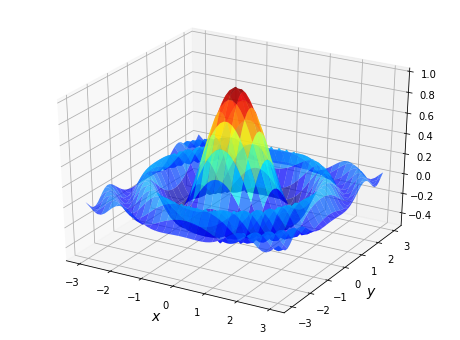

In [5]:
# Part 1: A Plot of f
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x,y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
               y,
               f(x,y),
               rstride=2, cstride=2,
               cmap=cm.jet,
               alpha=0.7,
               linewidth=0.25)
ax.set_zlim(-0.5, 1.0)

# PI5: add labels
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
plt.show()

In [53]:
grid = np.linspace(-3, 3, 1000)

A non-vectorized version.

In [54]:
%%time

m = -np.inf

for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z

CPU times: user 3.95 s, sys: 37.5 ms, total: 3.99 s
Wall time: 4.01 s


A vectorized version.

In [59]:
%%time

x, y = np.meshgrid(grid, grid) # PI6: why meshgrid here, compared to x, y = grid, grid
np.max(f(x, y))

CPU times: user 74 ms, sys: 15.8 ms, total: 89.8 ms
Wall time: 19.3 ms


0.9999819641085747

# 5 beyond vectorization
1. At its best, vectorization yields fast, simple code, but it also has disadvantages:
   - One issue is that it can be **highly memory-intensive**.
     - e.g., the vectorized maximization routine above is far more memory(**PI:-**)intensive than the non-vectorized version that preceded it.
     - This is because vectorization tends to **create many intermediate arrays** before producing the final calculation.
   - Another issue is that **not all algorithms can be vectorized**.
     - In these kinds of settings, we need to go back to **loops**.
     - Fortunately, there are **alternative ways to speed up Python loops** that work in almost any setting.
       - e.g., in the last few years, a new Python library called [Numba](http://numba.pydata.org/), has appeared that solves the main problems with vectorization listed above.
         - It does so through **just in time (JIT) compilation**, which can generate extremely fast and efficient code.